In [156]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
%run implementations.ipynb
%reload_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [157]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## 1. First model: Use raw data

In [137]:
# first to inspect the data, I notice many invalid values of -999
# for this first model I disregard them

# first to split the data into training and testing

ratio = 0.8
seed = 3

In [138]:

x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed)

# then to standardize x_tr and x_te

x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

# next to add a column of ones

y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)



In [139]:
### 1.1 First model: Use Least squares : train

In [140]:
# First Model using least squares

weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print(MSE_tr, MSE_te) #0.33927307620272856 11.175145651957722

0.339273076205053 11.1346836777524


In [141]:
### 1.2 First model: Use Least squares : predict

In [142]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.34396

0.34396

## 2. Second Model: delete all the lines with Nan values

In [143]:
# removing all nan but there actually are none
tX_2 = tX[~np.isnan(tX).any(axis=1)]

# removing all rows with -999, there are 181886
y = y[np.all(tX_2 != -999, axis=1)]
tX_2 = tX_2[np.all(tX_2 != -999, axis=1)]

x_tr, x_te, y_tr, y_te = split_data(tX_2, y, ratio, seed)

x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 2.1.1 Least squares for Second Model : train

In [144]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print(MSE_tr, MSE_te) #0.36864162046559024 0.5411866496785176

0.36864162046560583 0.5411160179301698


### 2.1.2 Least squares for Second Model : prediction

In [145]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.6120531454158409

0.6120531454158409

### 2.2.1  GD for Second Model : train

In [146]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.08

# Initialization
w_initial = np.ones(x_tr.shape[1])

gradient_w, gradient_loss = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma) 

print("Gradient final loss for w* = " + str(gradient_loss)) # 0.4131388507357264

Step 1/150 loss = 16.742723002367942
Step 2/150 loss = 13.640113171583597
Step 3/150 loss = 11.197208614873615
Step 4/150 loss = 9.24138694198122
Step 5/150 loss = 7.663721730951572
Step 6/150 loss = 6.386469086966046
Step 7/150 loss = 5.350289705071325
Step 8/150 loss = 4.508432432453081
Step 9/150 loss = 3.8235432932229165
Step 10/150 loss = 3.2655939588419374
Step 11/150 loss = 2.8103795766576734
Step 12/150 loss = 2.438364170002802
Step 13/150 loss = 2.1337688629695815
Step 14/150 loss = 1.883843255860384
Step 15/150 loss = 1.6782801536029626
Step 16/150 loss = 1.5087443685174675
Step 17/150 loss = 1.3684929531113685
Step 18/150 loss = 1.2520689442005632
Step 19/150 loss = 1.1550542964765458
Step 20/150 loss = 1.0738705085735651
Step 21/150 loss = 1.0056176944472426
Step 22/150 loss = 0.9479446554141302
Step 23/150 loss = 0.8989439562644808
Step 24/150 loss = 0.8570671735948375
Step 25/150 loss = 0.8210564219510522
Step 26/150 loss = 0.7898890181788067
Step 27/150 loss = 0.76273275

### 2.2.2  GD for Second Model : predict

In [147]:
# predict on the train data slice using the gradient_w
y_pred = predict_labels(gradient_w, x_tr)
# Check accuracy
print(np.mean(y_tr == y_pred)) # 0.6810115431906186

# predict on the test data slice
y_pred = predict_labels(gradient_w, x_te)
# Check accuracy
print(np.mean(y_te == y_pred)) # 0.687954195111209

0.6810115431906186
0.687954195111209


### 2.3  Ridge regression for Second Model : train

In [148]:
for lambda_ in [1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]:
    w, loss = ridge_regression(y_tr, x_tr, lambda_)
    y_pred = predict_labels(w, x_te)
    print("Lambda=" + str(lambda_)+"; Loss="+str(loss))
    
    # predict on the train data slice using the w
    y_pred = predict_labels(w, x_tr)
    # Check accuracy
    print("Predict: \n \t" + str(np.mean(y_tr == y_pred)))

    # predict on the test data slice
    y_pred = predict_labels(w, x_te)
    # Check accuracy
    print("\t" + str(np.mean(y_te == y_pred)) + "\n") # Best for lambda = 1e-10, 0.732511194303751

Lambda=1e-10; Loss=0.3686442007271991
Predict: 
 	0.7238076012552531
	0.732511194303751

Lambda=1e-05; Loss=0.3812050031774571
Predict: 
 	0.7140078178047751
	0.716141818982603

Lambda=0.0001; Loss=0.3912165017182041
Predict: 
 	0.7069240792057404
	0.7082874550392718

Lambda=0.001; Loss=0.3942938205380461
Predict: 
 	0.7047585839863464
	0.7071863759817955

Lambda=0.01; Loss=0.39827148514628047
Predict: 
 	0.6991429777394432
	0.7037363282683696

Lambda=0.1; Loss=0.41825458605913995
Predict: 
 	0.679855388963315
	0.6844307421272847

Lambda=1; Loss=0.44446970952443027
Predict: 
 	0.6696885724248041
	0.6718784408720546

Lambda=10.0; Loss=0.47831430825184806
Predict: 
 	0.6635591198546549
	0.6697496880276004

Lambda=100.0; Loss=0.4968364258616815
Predict: 
 	0.6343983410104421
	0.6381120164427806

Lambda=1000.0; Loss=0.49966605666548564
Predict: 
 	0.6239562496559065
	0.6285693312779858

Lambda=10000.0; Loss=0.4999664133399347
Predict: 
 	0.6227450404653979
	0.6270278205975189

Lambda=10000

## 3. Third Model: replace all the nanValues with the column mean

In [149]:
tX_3 = replace_nan_with_mean(tX, -999)
x_tr, x_te, y_tr, y_te = split_data(tX_3, y, ratio, seed)

x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 3.1.1 Third Model: Use least_squares : train

In [150]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print(MSE_tr, MSE_te) # 0.4978447945914003 0.62752070923795

0.4978447945914003 0.62752070923795


### 3.1.2 Third Model: Use least_squares: prediction

In [151]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.5331424796300375

0.5331424796300375

### 3.2.1 Third Model: Use GD : Train

In [152]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.08

# Initialization
w_initial = np.ones(x_tr.shape[1])

gradient_w, gradient_loss = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma) 

print("Gradient final loss for w* = " + str(gradient_loss)) # 0.5114768097194176


Step 1/150 loss = 17.3154463737639
Step 2/150 loss = 12.85154559694331
Step 3/150 loss = 10.15793488186782
Step 4/150 loss = 8.393558092837589
Step 5/150 loss = 7.146208061898201
Step 6/150 loss = 6.207766930275732
Step 7/150 loss = 5.468531107274744
Step 8/150 loss = 4.867250480498819
Step 9/150 loss = 4.367293147568957
Step 10/150 loss = 3.9451073486036248
Step 11/150 loss = 3.5845078798959227
Step 12/150 loss = 3.2737494035343864
Step 13/150 loss = 3.003955009009131
Step 14/150 loss = 2.768220499254645
Step 15/150 loss = 2.561068155727898
Step 16/150 loss = 2.3780904919748393
Step 17/150 loss = 2.215703848009918
Step 18/150 loss = 2.0709699189386273
Step 19/150 loss = 1.941462118389316
Step 20/150 loss = 1.8251632119498764
Step 21/150 loss = 1.720385701622581
Step 22/150 loss = 1.6257092655990142
Step 23/150 loss = 1.5399312431392322
Step 24/150 loss = 1.4620272297442622
Step 25/150 loss = 1.3911195764000153
Step 26/150 loss = 1.3264521046700746
Step 27/150 loss = 1.2673697309008858

### 3.2.2 Third Model: Use GD : Predict

In [153]:
# predict on the test data slice
y_pred = predict_labels(gradient_w, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.5006239447992366

0.5006239447992366

## 4. Fourth Model with Feature Augmentation

MemoryError: 

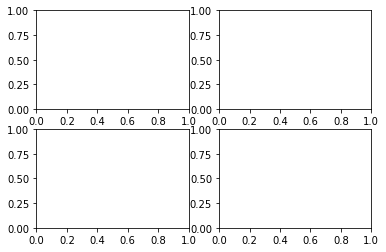

In [154]:

degrees = [1, 2, 3, 4]

# define the structure of the figure
num_row = 2
num_col = 2
f, axs = plt.subplots(num_row, num_col)
    
for ind, degree in enumerate(degrees):

        polynome = build_poly(x_tr,degree)
        w = least_squares(y_tr, polynome.T)
        MSE = compute_loss(y_tr, polynome, w)

        print("Processing {i}th experiment, degree={d}, mse={loss}".format( 
            i=ind + 1, d=degree, loss=MSE))
#         plot_fitted_curve(y_tr, x_tr, weights, degree, axs[ind // num_col][ind % num_col])
#         plt.tight_layout()
#         plt.show()


## Generate predictions and save ouput in csv format for submission:

In [158]:
# We observed that model 2 with ridge_regression method and lambda_ = 1e-10 (TODO, we have to check them all)

In [163]:
w, loss = ridge_regression(y, tX, 1e-10)

In [164]:
DATA_TEST_PATH = '../data/test.csv' # TODO: unzip the file
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [165]:
OUTPUT_PATH = 'out.csv'
y_pred = predict_labels(w, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)